In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from PIL import Image
import cv2 as cv

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Activation, Dropout, BatchNormalization

In [3]:
train_data_generator = ImageDataGenerator(
                                    zca_epsilon=1e-06,
                                    rotation_range=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.0,
                                    channel_shift_range=0.0,
                                    fill_mode='nearest',
                                    cval=0.0,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale=1./255,
                                    preprocessing_function=None,
                                    data_format=None,
                                    validation_split=0.2,
                                    dtype=None
                        )
train_directory='./Dataset/Eye_Images/train/'
train_data = train_data_generator.flow_from_directory(train_directory,
                                                    target_size=(64, 64),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    shuffle=True,
                                                    seed=None,
                                                    subset='training'
                                                    )
validation_data = train_data_generator.flow_from_directory(train_directory,
                                                          target_size=(64,64),
                                                           color_mode='rgb',
                                                           batch_size=32,
                                                           shuffle=True,
                                                           subset='validation'
                                                          )

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [4]:
test_data_generator = ImageDataGenerator(rescale=1./255)
test_directory = './Dataset/Eye_Images/test/'
test_data = test_data_generator.flow_from_directory(test_directory,
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary'
                                                   )
print(len(test_data.filenames))

Found 846 images belonging to 2 classes.
846


In [31]:
# Model : Test-Acc: 92%, Train-Acc:91%, Val-Acc: 90%
model = Sequential()
model.add(Convolution2D(filters=20, kernel_size= (5,5), strides=1, padding='same', input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters=50, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(x=train_data, epochs=20, verbose=1, validation_data=validation_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 25 steps
Epoch 1/20
100/100 [==============================] - 42s 421ms/step - loss: 0.6845 - accuracy: 0.5405 - val_loss: 0.6644 - val_accuracy: 0.5181
Epoch 2/20
100/100 [==============================] - 38s 384ms/step - loss: 0.6284 - accuracy: 0.6480 - val_loss: 0.5419 - val_accuracy: 0.7550
Epoch 3/20
100/100 [==============================] - 38s 378ms/step - loss: 0.5918 - accuracy: 0.6859 - val_loss: 0.5325 - val_accuracy: 0.7644
Epoch 4/20
100/100 [==============================] - 37s 372ms/step - loss: 0.4966 - accuracy: 0.7647 - val_loss: 0.4020 - val_accuracy: 0.8144
Epoch 5/20
100/100 [==============================] - 38s 380ms/step - loss: 0.4450 - accuracy: 0.8052 - val_loss: 0.4049 - val_accuracy: 0.8369
Epoch 6/20
100/100 [==============================] - 38s 380ms/step - loss: 0.4045 - accuracy: 0.8234 - val_loss: 0.3560 - val_accuracy: 0.8512
Epoch 7/20
100/100 [=================

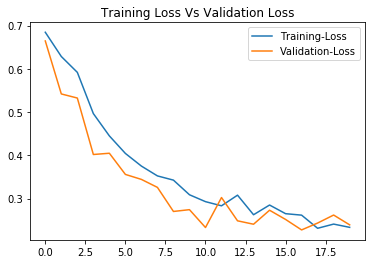

In [47]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(history.history['loss'], label='Training-Loss')
ax.plot(history.history['val_loss'], label='Validation-Loss')
plt.title('Training Loss Vs Validation Loss')
ax.legend()
plt.show()

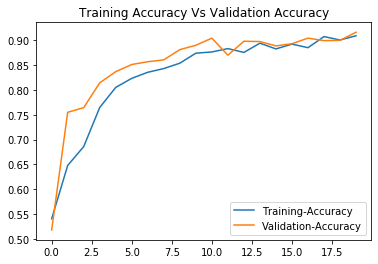

In [48]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(history.history['accuracy'], label='Training-Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation-Accuracy')
plt.title('Training Accuracy Vs Validation Accuracy')
ax.legend()
plt.show()

In [50]:
tf.keras.models.save_model(model, 'Lenet-5-CNN-20Epcoh-96Ac.h5')

In [49]:
y_actuals = []
y_preds = []
for i in range(27):
    #print(test_data[i][1])
    y_actuals.extend(test_data[i][1])
    y_preds.extend(model.predict(test_data[i][0]).argmax(axis=1))

In [37]:
pd.DataFrame({
'Actual': y_actuals,
'Predicted': y_preds
})

,Actual,Predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,1.0,0
4,1.0,1
...,...,...
841,0.0,0
842,0.0,1
843,0.0,0
844,0.0,0


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_actuals, y_preds))
print(confusion_matrix(y_actuals, y_preds))
print(accuracy_score(y_actuals, y_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       384
         1.0       0.94      0.90      0.92       462

    accuracy                           0.92       846
   macro avg       0.92      0.92      0.92       846
weighted avg       0.92      0.92      0.92       846

[[359  25]
 [ 44 418]]
0.9184397163120568


Text(0.5, 1, 'Confusion Matrix')

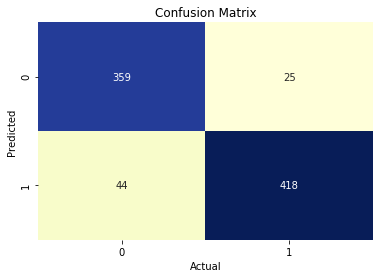

In [64]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_actuals, y_preds), annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

In [71]:
print(classification_report(y_actuals, y_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       384
         1.0       0.94      0.90      0.92       462

    accuracy                           0.92       846
   macro avg       0.92      0.92      0.92       846
weighted avg       0.92      0.92      0.92       846



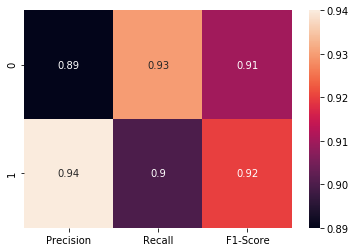

In [77]:
df = {
    'Precision' : [0.89,0.94],
    'Recall': [0.93,0.90],
    'F1-Score': [0.91,0.92]
}
sns.heatmap(pd.DataFrame(df), annot=True)